# Housing Prices Analysis

Mcadams needs to grow and acquire more CE firms to meet its 2027 revenue target. An acquisition is a big investment for Mcadams to make, so we must analyze the housing market to limit the risk and find the right time to acquire a firm. Currently, Mcadams has a large percentage of Real Estate related projects in its portfolio, so the housing market has a lot of influence on Mcadams' revenue streams. This analysis will answer the question of when to buy a firm based on the macro housing market.

## Objectives:
- Analyze recent housing prices and find trends.
- Compare housing prices to the CPI Index.
- Run a linear regression to find the fair prices for houses and when these fair prices will be seen in the future.

## Data Sources:
- United States Bureau of Labor Statistics
- Zillow
- Kaggle

In [248]:
#Import necessary libraries for the report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
#Import data
zhvi_data = pd.read_csv(r"C:\Users\Nathan\Documents\Python Projects\Zillow Home Values\ZHVI.csv")
zhvi_data['Unnamed: 0'] = pd.to_datetime(zhvi_data['Unnamed: 0'], infer_datetime_format=True)
zhvi_data.rename({'Unnamed: 0':'Date'}, axis=1, inplace=True)
zhvi_data.set_index('Date', inplace=True)

cpi_historical_data = pd.read_excel(r"C:\Users\Nathan\Documents\Python Projects\Zillow Home Values\cpi_data.xlsx")

## Zillow Data:

Below is a preview of the Zillow dataframe. It is compromised of monthly housing prices for each state dating back to 2000. This is a good dataset to analyze because it includes the 2008 Housing Crash, which can help with forecasting.

In [272]:
zhvi_data.head()

,Virginia,California,Florida,Texas,New York,Arizona,New Jersey,West Virginia,Nevada,North Carolina,...,Ohio,New Hampshire,Alaska,Oklahoma,Arkansas,Alabama,Louisiana,South Dakota,Wyoming,Mississippi
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,137233.0,199238.0,115665.0,114445.0,150761.0,135257.0,185076.0,71413.0,162642.0,135455.0,...,112006.0,139728.0,132292.0,80820.0,81668.0,103937.0,106413.0,119069.0,NaN,85835.0
2000-02-01,137726.0,200084.0,116007.0,114569.0,151532.0,135585.0,185840.0,71473.0,162689.0,135788.0,...,112171.0,140419.0,132480.0,80886.0,81842.0,104218.0,106762.0,118802.0,NaN,85847.0
2000-03-01,138185.0,201150.0,116368.0,114609.0,152176.0,135970.0,186480.0,71547.0,163004.0,136072.0,...,112347.0,141141.0,132632.0,81104.0,81995.0,104372.0,106969.0,118429.0,NaN,85893.0
2000-04-01,139012.0,203391.0,117069.0,114816.0,153537.0,136721.0,187858.0,71680.0,163673.0,136662.0,...,112803.0,142118.0,132759.0,81443.0,82306.0,104722.0,107434.0,118016.0,NaN,86054.0
2000-05-01,139735.0,205795.0,117736.0,114866.0,154766.0,137503.0,189055.0,71811.0,164384.0,137216.0,...,113355.0,143135.0,133007.0,81847.0,82533.0,105052.0,107821.0,117942.0,NaN,86481.0


## CPI Data:

Below is a preview of the CPI dataframe. It includes monthly statistics dating back to 2000.

In [283]:
cpi_historical_data['Label'] = pd.to_datetime(cpi_historical_data['Label'], infer_datetime_format=True)
cpi_df = cpi_historical_data.rename({'Label':'Date'}, axis=1)
cpi_df.set_index('Date')

,Year,Period,Observation Value,1-Month % Change,12-Month % Change
Date,,,,,
2000-01-01,2000,M01,168.800,0.3,2.7
2000-02-01,2000,M02,169.800,0.6,3.2
2000-03-01,2000,M03,171.200,0.8,3.8
2000-04-01,2000,M04,171.300,0.1,3.1
2000-05-01,2000,M05,171.500,0.1,3.2
...,...,...,...,...,...
2022-06-01,2022,M06,296.311,1.4,9.1
2022-07-01,2022,M07,296.276,0.0,8.5
2022-08-01,2022,M08,296.171,0.0,8.3


## North Carolina and Texas Housing Prices:

The graph below shows the monthly housing prices for North Carolina and Texas for the last 22 years. North Carolina is the blue line and Texas is the orange line. The graph shows a rise and fall in prices associated with the 2008 Housing Crash. Also, the graph shows a significant rise in prices within the last couple years, but it looks like the prices are leveling off in recent months.

Text(0, 0.5, 'Price')

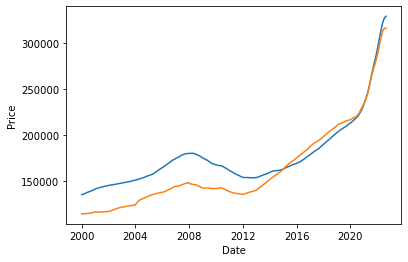

In [339]:
#Graph housing price data
sns.lineplot(data=zhvi_data['North Carolina'])
sns.lineplot(data=zhvi_data['Texas'])
plt.ylabel("Price")

## Recent Price Trends:

The calculations below show the housing price trends for all the states.

- The data shows that 11 states experienced negative monthly percent changes last month, so prices are falling in 20 percent of the United States.

- Also, 38 states experienced onsecutive months of lower monthly percent changes for the third quarter. This trend includes large population states like Texas, Florida, and North Carolina.

It looks likely that housing prices has reached its high and prices will enter a correction period and stabilize at lower prices.

In [302]:
#Calculate the monthly percentage changes
zhvi_pct = zhvi_data.pct_change().mul(100)

#Number of states with a negative monthly percentage change in home prices for the latest month
latest_month = zhvi_pct.filter(items = ['2022-09-01'], axis = 0).apply(lambda x: (x<0).sum(), axis=1)
latest_month

Date
2022-09-01    11
dtype: int64

In [296]:
#States with decreasing monthly percent changes in home prices in Q3
latest_quarter = zhvi_pct.filter(items = ['2022-07-01','2022-08-01','2022-09-01'], axis = 0)
latest_quarter_transposed = latest_quarter.T
latest_quarter_transposed["Decreasing Percent Change"] = (latest_quarter_transposed['2022-07-01'] > latest_quarter_transposed['2022-08-01']) & (latest_quarter_transposed['2022-08-01'] > latest_quarter_transposed['2022-09-01'])
states_decreasing_percent_change = latest_quarter_transposed[latest_quarter_transposed["Decreasing Percent Change"] == True]
states_decreasing_percent_change

Date,2022-07-01,2022-08-01,2022-09-01,Decreasing Percent Change
Virginia,0.685169,0.447529,0.365338,True
Florida,1.570879,0.884509,0.373638,True
Texas,0.791215,0.285167,0.004433,True
New York,0.755238,0.449844,0.240952,True
Arizona,-0.181298,-0.953205,-1.521150,True
New Jersey,0.942134,0.494562,0.322414,True
Nevada,0.118184,-0.670284,-1.330060,True
North Carolina,1.094797,0.733546,0.355400,True
Michigan,0.323560,0.193594,0.084798,True
Georgia,1.017867,0.690648,0.283836,True


## Comparing CPI and Housing Prices Data:

Now, we will graph the 12-month percent changes in CPI, North Carolina housing prices, and Texas housing prices.

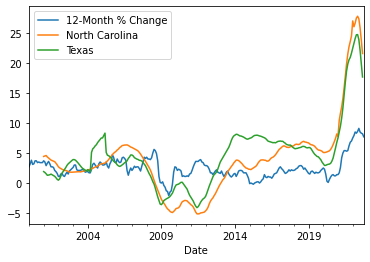

In [325]:
#Calculate the 12-month percentage changes
zhvi_pct_12 = zhvi_data.pct_change(12).mul(100)

#Graph the data
ax = cpi_df.plot(x='Date', y='12-Month % Change')
zhvi_pct_12.plot(ax=ax, y='North Carolina')
zhvi_pct_12.plot(ax=ax, y='Texas')
plt.show()

In [324]:
#Merge dataframes and correlate
result = pd.merge(cpi_df, zhvi_pct_12, on='Date')
result.filter(items=['12-Month % Change','North Carolina','Texas']).corr()

,12-Month % Change,North Carolina,Texas
12-Month % Change,1.000000,0.663178,0.546170
North Carolina,0.663178,1.000000,0.917325
Texas,0.546170,0.917325,1.000000


The graph shows that the percent changes for the CPI, North Carolina housing prices, and Texas housing prices experienced falling figures during the 2008 recession. Also, both variables show large increases in recent years and slight decreases in recent months. Even though the variables appear highly correlated on the graph, they only have a 0.66 and 0.55 correlation for North Carolina and Texas, respectively. So, the CPI can be used to draw some conclusions, but should not be weighted highly in the decision-making process.

## Linear Regression of Time Series Housing Data:

Next, we will graph a linear regression for the housing data, so we can predict when prices will balance out in the future.

In [353]:
#Merge dataframes and filter
merged_df = pd.merge(cpi_df, zhvi_data, on='Date')
filtered_df = merged_df.filter(items=['12-Month % Change','North Carolina','Texas'])
filtered_df['Time'] = np.arange(len(filtered_df.index))

Text(0, 0.5, 'Price')

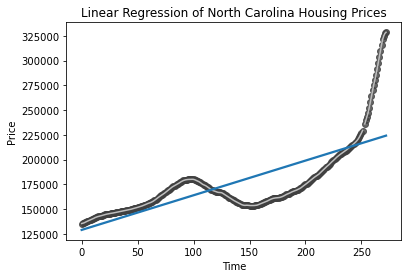

In [354]:
#Graph the regression
fig, ax = plt.subplots()
ax.plot('Time', 'North Carolina', data=filtered_df, color='0.75')
ax = sns.regplot(x='Time', y='North Carolina', data=filtered_df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Linear Regression of North Carolina Housing Prices')
plt.ylabel('Price')

The above graph shows that the North Carolina housing prices are very inflated above the regression line. Mcadams can expect a correction in prices towards the regression line in the future. During the 2008 recession, North Carolina housing prices took years to come back to the regression line from its highs. Plus, prices kept falling below the regression line for years after that. Mcadams can expect decreasing housing prices for years to come, and Mcadams should not look to acquire another firm until prices at least reach the regression line. Waiting will allow Mcadams to get a better price for potential firms.

Text(0, 0.5, 'Price')

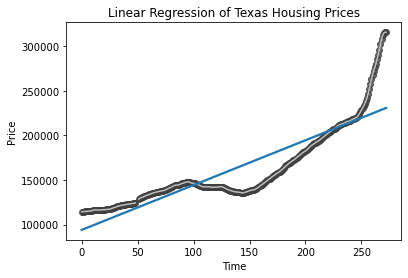

In [352]:
#Graph the regression
fig, ax = plt.subplots()
ax.plot('Time', 'Texas', data=filtered_df, color='0.75')
ax = sns.regplot(x='Time', y='Texas', data=filtered_df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Linear Regression of Texas Housing Prices')
plt.ylabel('Price')

The linear regression line for the Texas housing prices paints a very similar picture to the North Carolina graph above. Texas housing prices are inflated far above the regression line. Mcadams can expect a price correction in the future.

## Conclusion:

- The majority of states are experiencing slowing growth in housing prices, and 20% of states are experiencing falling prices. This trend indicates that prices will begin decreasing in all states soon.

- The Consumer Price Index shows a fall during the 2008 recession and a large rise in recent years just like US housing prices, but they do not have a high correlation figure. So, watching the CPI can be helpful for management, but more variables should be weighed when making market-based decisions for growth.

- The regression lines for the housing data show that prices are very inflated right now and should decrease back towards the line in the future. The past decreasing price cycle during the 2008 recession lasted years, so management can expect decreasing housing prices for years to come.

- Mcadams should wait to acquire new firms because their current project portfolio is too open to risk from a falling housing market. Also, Mcadams will be able to acquire potential firms at cheaper prices in the future, after Mcadams weathers the potential housing market slowdown.

- According to the Fannie Mae Housing Market Sentiment Index, the sentiment score is at its lowest point ever recorded. This means that demand is drying up, so housing prices will keep falling and Mcadams should prepare.